In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.figure_factory as ff

/Users/vigneshkkar/Documents/Vigneshkkar/AIML/Visualization for AI and ML/project/.VIS/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
Landings = pd.read_csv("Meteorite_Landings.csv")
Impacts = pd.read_csv("impacts.csv")
Orbit = pd.read_csv("orbits.csv")

# Past Landings

In [3]:
Landings.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [4]:
Landings.describe()

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


In [5]:
Landings.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [6]:
Landings["mass (g)"] = Landings["mass (g)"].fillna(0)

In [7]:
Landings["fall"].value_counts()

Found    44609
Fell      1107
Name: fall, dtype: int64

In [8]:
Fallen = Landings[(Landings["fall"] == "Fell") & (Landings["mass (g)"] > 0)]
Fallen = Fallen.sort_values("year")

In [9]:
scatter_3d_no_size = px.scatter_3d(Fallen, x='year', y='reclat', z='reclong',
              color='recclass')
scatter_3d_no_size.show()

In [10]:
scatter_3d_size = px.scatter_3d(Fallen, x='year', y='reclat', z='reclong', size="mass (g)",
              color='recclass') 
scatter_3d_size.show()

In [11]:
Fallen["year"] = Fallen["year"].apply(int)
map_plot = px.scatter_geo(Fallen, lat=Fallen.reclat,
                    lon=Fallen.reclong,
                    color="recclass",
                    hover_name="name",
                    # size="mass (g)",
                    animation_frame="year",
                     projection="orthographic")
map_plot.show()

# Future Impact Analysis

In [12]:
Impacts.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [13]:
rel_plot = px.scatter_matrix(Impacts, dimensions=["Asteroid Velocity", "Asteroid Magnitude", "Asteroid Diameter (km)"], labels={"Asteroid Velocity":"Speed", "Asteroid Magnitude": "Magnitude", "Asteroid Diameter (km)": "Size"}, color="Possible Impacts")
rel_plot.show()

In [14]:
histogram = make_subplots(rows=4, cols=1, subplot_titles=('Possible Impacts','Asteroid Velocity', 'Asteroid Magnitude', "Asteroid Diameter (km)" ))

histogram.add_trace(go.Histogram(x=Impacts['Possible Impacts'], name="Possible Impacts"), row=1, col=1) 
histogram.add_trace(go.Histogram(x=Impacts['Asteroid Velocity'], name="Asteroid Velocity"), row=2, col=1) 
histogram.add_trace(go.Histogram(x=Impacts['Asteroid Magnitude'], name="Asteroid Magnitude"), row=3, col=1) 
histogram.add_trace(go.Histogram(x=Impacts['Asteroid Diameter (km)'], name="Asteroid Diameter (km)"), row=4, col=1) 
histogram.update_layout(showlegend=False, title_text="Distribution of astroid features", width=1000, height=1300)

histogram.show()

In [15]:
pd.options.mode.chained_assignment = None 
YearsPlot = Impacts[Impacts["Period End"] <= 2199 ]
YearsPlot["Start"] = YearsPlot["Period Start"].apply(str)
YearsPlot["Finish"] = YearsPlot["Period End"].apply(str)
timeline = px.timeline(YearsPlot,  x_start="Start", x_end="Finish", y="Object Name")
timeline.show()

In [16]:
Impacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Object Name                    683 non-null    object 
 1   Period Start                   683 non-null    int64  
 2   Period End                     683 non-null    int64  
 3   Possible Impacts               683 non-null    int64  
 4   Cumulative Impact Probability  683 non-null    float64
 5   Asteroid Velocity              683 non-null    float64
 6   Asteroid Magnitude             683 non-null    float64
 7   Asteroid Diameter (km)         683 non-null    float64
 8   Cumulative Palermo Scale       683 non-null    float64
 9   Maximum Palermo Scale          683 non-null    float64
 10  Maximum Torino Scale           683 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 58.8+ KB


In [17]:
print(f"Maximum Torino Scale : {max(Impacts['Maximum Torino Scale'])}")
print(f"Maximum Palermo Scale : {max(Impacts['Maximum Palermo Scale'])}")
print(f"Cumulative Palermo Scale : {max(Impacts['Cumulative Palermo Scale'])}")

Maximum Torino Scale : 0
Maximum Palermo Scale : -1.42
Cumulative Palermo Scale : -1.42


In [18]:
Impacts.drop(['Maximum Torino Scale'], axis=1, inplace=True)

In [19]:
Impacts.describe()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
count,683.000000,683.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2062.573939,2099.680820,43.348463,1.539476e-04,11.462577,26.158272,0.049378,-6.511552,-6.804012
std,43.501694,37.594698,113.773280,2.519607e-03,6.067772,2.388296,0.156403,1.509189,1.476135
min,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.980000,-11.000000
25%,2034.000000,2090.000000,2.000000,1.100000e-07,7.240000,25.000000,0.010000,-7.490000,-7.790000
50%,2061.000000,2109.000000,6.000000,1.700000e-06,10.500000,26.400000,0.017000,-6.460000,-6.790000
75%,2085.000000,2114.000000,29.000000,1.550000e-05,14.810000,27.800000,0.033000,-5.490000,-5.865000
max,2880.000000,2880.000000,1144.000000,6.500000e-02,39.470000,31.600000,2.579000,-1.420000,-1.420000


In [66]:
x.tolist()

['Period Start',
 'Period End',
 'Possible Impacts',
 'Cumulative Impact Probability',
 'Asteroid Velocity',
 'Asteroid Magnitude',
 'Asteroid Diameter (km)',
 'Cumulative Palermo Scale',
 'Maximum Palermo Scale']

In [84]:
x = Impacts.corr().columns
y = Impacts.corr().index
new = Impacts.corr().reset_index(drop=True)
corr_mat = [(Impacts.corr()[d] * 10000)//100  for d in new ]
corr_mat = np.array(corr_mat)
x= np.array(x).tolist()
y= np.array(y).tolist()
fig = ff.create_annotated_heatmap(corr_mat, x=x,y=y, annotation_text=corr_mat, colorscale='Viridis')

fig.show()


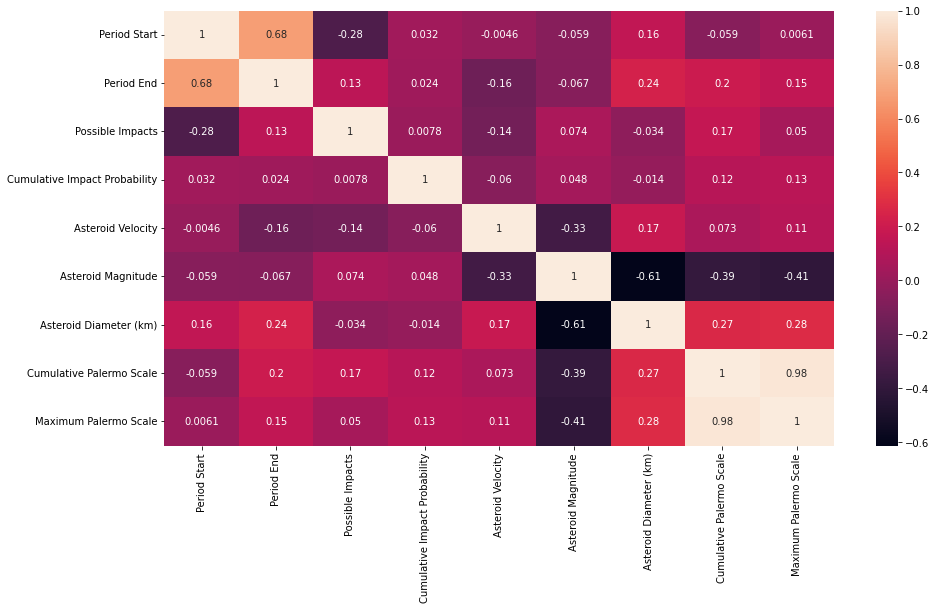

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(Impacts.corr(), annot=True)
plt.show()

In [21]:
Features = np.array(Impacts.columns[1:]).reshape(3,3)
# np.array(Features).reshape(3,3)
Features

array([['Period Start', 'Period End', 'Possible Impacts'],
       ['Cumulative Impact Probability', 'Asteroid Velocity',
        'Asteroid Magnitude'],
       ['Asteroid Diameter (km)', 'Cumulative Palermo Scale',
        'Maximum Palermo Scale']], dtype=object)

In [22]:
def drawBoxPlot(Impacts, Features):
    boxPlot = make_subplots(rows=Features.shape[0], cols=Features.shape[1])

    for iy, ix in np.ndindex(Features.shape):
        boxPlot.add_trace(go.Box(y=Impacts[Features[iy][ix]], name=Features[iy][ix]), row=iy+1, col=ix+1) 

    boxPlot.update_layout(height=1000, showlegend=False)
    boxPlot.show()

def removeOutliers(df, features):
    df_copy = df.copy()

    for feature in features:

        # Calculate q1, q3 and iqr
        q3 = df[feature].quantile(0.75)
        q1 = df[feature].quantile(0.25)
        iqr = q3 - q1

        # Get local minimum and maximum
        local_min = q1 - (1.5 * iqr)
        local_max = q3 + (1.5 * iqr)

        # Remove the outliers
        df_copy = df_copy[(df_copy[feature] >= local_min) & (df_copy[feature] <= local_max)]
        return df_copy

In [23]:
drawBoxPlot(Impacts=Impacts, Features=Features)

In [24]:
Impacts_Cleaned = removeOutliers(Impacts, Features.flatten())

In [25]:
drawBoxPlot(Impacts=Impacts_Cleaned, Features=Features)


In [26]:
Impacts_Cleaned.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30


In [27]:
fig = px.sunburst(
    Impacts_Cleaned,
    path=['Period Start','Period End', 'Object Name'], values='Asteroid Diameter (km)'
)
fig.show()

/Users/vigneshkkar/Documents/Vigneshkkar/AIML/Visualization for AI and ML/project/.VIS/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/vigneshkkar/Documents/Vigneshkkar/AIML/Visualization for AI and ML/project/.VIS/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/vigneshkkar/Documents/Vigneshkkar/AIML/Visualization for AI and ML/project/.VIS/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Start Building Model

In [28]:
def plotElbow(df,features):
    x_cord = []
    y_cord = []

    for k in range(1, 11):
        model = KMeans(n_clusters=k)
        model.fit(df[features])
        y_cord.append(model.inertia_)
        x_cord.append(k)
    fig = px.line(x=x_cord, y=y_cord, title="Clusers list")
    fig.show()

In [29]:
plotElbow(Impacts_Cleaned, Features.flatten())

In [30]:
distance_matrix = linkage(Impacts_Cleaned[Features.flatten()], method='complete')

fig = ff.create_dendrogram(distance_matrix)
fig.show()

In [31]:
theme = "plotly"
def drawCluster(X, y, dim=2 , withSize=False):
    pca = PCA(dim)
    X_component = pca.fit_transform(X)
    x1 = X_component[:, 0]
    x2 = X_component[:, 1]

    if (dim == 2):
        if(withSize):
            fig= px.scatter(x=x1, y= x2, color=y, template=theme, size=X["Asteroid Diameter (km)"])
        else:
            fig= px.scatter(x=x1, y= x2, color=y, template=theme)
        return fig

    elif (dim == 3):
        x3 = X_component[:, 2]
        if(withSize):
            fig = px.scatter_3d(X_component, x=x1, y=x2, z=x3, color=y, size=X["Asteroid Diameter (km)"], template=theme)
        else:
            fig = px.scatter_3d(X_component, x=x1, y=x2, z=x3, color=y, template=theme)
        return fig


In [32]:
Impact_model = KMeans(n_clusters=3)
Impact_model_labels = Impact_model.fit_predict(Impacts_Cleaned[Features.flatten()])
centroids = Impact_model.cluster_centers_

Impacts_Cleaned["Labels"] = Impact_model_labels


In [33]:
Impacts_Cleaned["Labels"].value_counts()

2    615
0     45
1     20
Name: Labels, dtype: int64

In [34]:

drawCluster(X=Impacts_Cleaned[Features.flatten()], y=Impacts_Cleaned["Labels"]).show()


In [35]:
drawCluster(X=Impacts_Cleaned[Features.flatten()], y=Impacts_Cleaned["Labels"], withSize=True).show()

In [36]:
drawCluster(X=Impacts_Cleaned[Features.flatten()], y=Impacts_Cleaned["Labels"], dim=3).show()


In [37]:
drawCluster(X=Impacts_Cleaned[Features.flatten()], y=Impacts_Cleaned["Labels"], dim=3, withSize=True).show()